<a href="https://colab.research.google.com/github/rechavar/pyCovid_TechLabsProj/blob/Phillip/TechLabs__finalProject_interactive_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TechLabs final project 
## (Problem 2 - Group 8)

---

This notebook represents the work in the final project of the Techlabs #codeathome course.
<br> <br>
Team members: Luca Wulfert, Laura Laks, Phillip Guske, Juliana Bedoya, Alejandro Echavarria and Marco Stoever

---

# Data Preparation

### libraries

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Constants

In [0]:
confirmed_csv_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
death_csv_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
recovered_csv_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'
countries_csv_url = 'https://raw.githubusercontent.com/rechavar/pyCovid_TechLabsProj/master/countries.csv'

### Data Exploration

---
GitHub repository: https://github.com/CSSEGISandData/COVID-19 
<br>
(c) Johns Hopkins University Center for Systems Science and Engineering <br> <br>
The datasets were also used by Kaggle for their weekly *COVID19 Global Forecasting* competition. <br>
(e.g. see: https://www.kaggle.com/c/covid19-global-forecasting-week-5)


---







In [0]:
df_confirmed = pd.read_csv(confirmed_csv_url)
df_death = pd.read_csv(death_csv_url)
df_recovered = pd.read_csv(recovered_csv_url)
df_countries = pd.read_csv(countries_csv_url)

In [0]:
df_confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,6402,6664,7072,7653,8145,8676,9216,9998,10582,11173
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,933,946,948,949,964,969,981,989,998,1004
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,6821,7019,7201,7377,7542,7728,7918,8113,8306,8503
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,761,761,761,761,762,762,762,762,762,763
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,48,48,50,52,52,58,60,61,69,70


In [0]:
df_death.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,168,169,173,178,187,193,205,216,218,219
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,31,31,31,31,31,31,31,31,32,32
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,542,548,555,561,568,575,582,592,600,609
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,51,51,51,51,51,51,51,51,51,51
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,2,2,3,3,3,3,3,4,4,4


In [0]:
df_recovered.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,745,778,801,850,930,938,996,1040,1075,1097
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,714,715,727,742,758,771,777,783,789,795
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,3409,3507,3625,3746,3968,4062,4256,4426,4784,4747
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,615,617,624,628,639,639,652,653,653,663
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,17,17,17,17,17,17,17,18,18,18


In [0]:
pd.set_option('display.max_rows', 300)

print(df_confirmed.iloc[:,1:2])
print(df_death.iloc[:,1:2])
print(df_recovered.iloc[:,1:2])

#Taiwan is written with an asterisk (*) at the end, we have to change this:
#We also want to have "USA" instead of "US":
#Congo (Brazzaville) and Congo (Kinshasa) are capitals of different countries!
#Brazzaville -> Republic of the Congo || Kinshasa -> Democratic Republic of the Congo

#We will change this in the data cleaning part

                       Country/Region
0                         Afghanistan
1                             Albania
2                             Algeria
3                             Andorra
4                              Angola
5                 Antigua and Barbuda
6                           Argentina
7                             Armenia
8                           Australia
9                           Australia
10                          Australia
11                          Australia
12                          Australia
13                          Australia
14                          Australia
15                          Australia
16                            Austria
17                         Azerbaijan
18                            Bahamas
19                            Bahrain
20                         Bangladesh
21                           Barbados
22                            Belarus
23                            Belgium
24                              Benin
25          

In [0]:
#reset max_rows displayed to default number (10):
pd.set_option('display.max_rows', 10)

In [0]:
all_dataframes = {'confirmed': df_confirmed,
                  'death': df_death,
                  'recovered': df_recovered,
                  'countries': df_countries}

### Data Cleaning

In [0]:
for key, df in all_dataframes.items():
  print('cleaning: {}'.format(key))

  if key == 'countries':
    continue

  df.drop(['Province/State', 'Lat', 'Long'], axis = 1, inplace = True)

  #Country renaming:
  df["Country/Region"].replace(["Taiwan*", "US", "Congo (Brazzaville)", "Congo (Kinshasa)"], 
                               ["Taiwan", "USA", "Republic of the Congo", "Democratic Republic of the Congo"],
                               inplace = True)
  #Set new index
  df.set_index('Country/Region', inplace = True)

  #Grouping together countries originally split into multiple Provinces/States
  #(Australia, Canada, China, Denmark, France, Netherlands, United Kingdom)
  df = df.groupby(by = df.index, axis = 0).sum()

  # Addition of a "global" row
  df.loc['Global'] = df.sum(axis=0)

  #transpose
  df=df.T
  df.rename_axis(index='Date', columns="Country",inplace=True)
  df.index = pd.to_datetime(df.index)

  #Naming the Date index:
  df.index.rename("Date", inplace= True)

  #Creating a datetime index:
  df.index = pd.to_datetime(df.index)
  
  #Save new dataFrame
  all_dataframes[key] = df

# Change country names in df_countries
old_names = [ 'Myanmar [Burma]', 'Cape Verde',  "C?te d'Ivoire", 'Czech Republic',
             'Congo [DRC]',  'Swaziland', 'Vatican City',  'South Korea', 'Macedonia [FYROM]',
              'Congo [Republic]',  'S?o Tom? and Pr?ncipe',  'United States',  'Gaza Strip','Sudan']

new_names = ['Burma', 'Cabo Verde', "Cote d'Ivoire", 'Czechia', 'Democratic Republic of the Congo',
              'Eswatini',  'Holy See',  'Korea, South',  'North Macedonia',  'Republic of the Congo',
             'Sao Tome and Principe', 'USA',  'West Bank and Gaza','South Sudan']

all_dataframes['countries'] = all_dataframes['countries'].replace(old_names, new_names)

cleaning: confirmed
cleaning: death
cleaning: recovered
cleaning: countries


In [0]:
all_dataframes['confirmed']
#now 186 countries in total + cruise ships "Diamond Princess" & "MS Zaandam" + "Global" count

Country,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe,Global
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-22,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,555
2020-01-23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,0,0,0,0,0,654
2020-01-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,0,0,0,0,0,941
2020-01-25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,0,0,0,0,0,1434
2020-01-26,0,0,0,0,0,0,0,0,4,0,...,0,0,0,2,0,0,0,0,0,2118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-05-21,8676,969,7728,762,58,25,9931,5606,7095,16404,...,749,2964,882,324,423,6,197,866,51,5102424
2020-05-22,9216,981,7918,762,60,25,10649,5928,7099,16436,...,753,3028,944,324,423,6,209,920,51,5210817
2020-05-23,9998,989,8113,762,61,25,11353,6302,7114,16486,...,764,3115,1010,325,423,6,212,920,56,5310362


### New Dataframe: Active Cases

In [0]:
all_dataframes['active'] = all_dataframes['confirmed'] - all_dataframes['recovered'] - all_dataframes['death']

## Calculating Projections (Marco)

In [0]:
def create_country(country):
  country_confirmed=all_dataframes["confirmed"].loc[:,[country]]
  country_confirmed["Total Cases"]=country_confirmed[country]
  country_confirmed.drop(country, inplace=True, axis=1)
  country_confirmed.rename_axis(columns=country,inplace=True)
  country_confirmed["New Cases"]=(country_confirmed["Total Cases"]-country_confirmed.shift(1)["Total Cases"])
  country_confirmed["R_7"]=(country_confirmed["Total Cases"]-country_confirmed.shift(7)["Total Cases"])/(country_confirmed.shift(4)["Total Cases"]-country_confirmed.shift(11)["Total Cases"])
  return(country_confirmed)

country_dataframes = {country: create_country(country) for country in all_dataframes["confirmed"].columns}

In [0]:
country_dataframes["Argentina"].tail(10)

Argentina,Total Cases,New Cases,R_7
Date,,,
2020-05-16,7805,326.0,1.314971
2020-05-17,8068,263.0,1.217235
2020-05-18,8371,303.0,1.187181
2020-05-19,8809,438.0,1.202355
2020-05-20,9283,474.0,1.184820
2020-05-21,9931,648.0,1.375123
2020-05-22,10649,718.0,1.514572
2020-05-23,11353,704.0,1.579697
2020-05-24,12076,723.0,1.667221


In [0]:
from datetime import timedelta

def create_projection(country):

  country_prediction=(pd.DataFrame(index=pd.date_range(start=country_dataframes[country].index[-1], periods=14, freq='D'), 
                                   columns=["Total Cases", "New Cases", "R_7"]))
  country_prediction.drop(country_prediction.index[0], inplace=True)
  country_prediction.rename_axis(index='Date', columns=country,inplace=True)
  country_prediction.index=pd.to_datetime(country_prediction.index)
  country_dataframes[country]["Prediction"]=False
  country_prediction["Prediction"]=True

  country_combined=pd.concat([country_dataframes[country], country_prediction])

  R_slidervalue_country=country_dataframes[country]["R_7"][-1]

  for date in country_combined.index:
    if country_combined.loc[date, 'Prediction']:
      country_combined.loc[date, 'Total Cases']=R_slidervalue_country*(country_combined.shift(4).loc[date, 'Total Cases']-country_combined.shift(5).loc[date, 'Total Cases'])+country_combined.shift(1).loc[date, 'Total Cases']

  country_combined['New Cases']=country_combined['Total Cases']-country_combined.shift(1)['Total Cases']
  for date in country_combined.index:
    try:
      country_combined.loc[date, "R_7"]=(country_combined.loc[date, "Total Cases"]-country_combined.shift(7).loc[date, "Total Cases"])/(country_combined.shift(4).loc[date, "Total Cases"]-country_combined.shift(11).loc[date, "Total Cases"])
    except ZeroDivisionError:
      country_combined.loc[date, 'R_7']=None
  country_combined["Total Cases"]=country_combined["Total Cases"].astype('float64')
  country_combined["New Cases"]=country_combined["New Cases"].astype('float64')
  country_combined["R_7"]=country_combined["R_7"].astype('float64')
  return (country_combined)  
projection_dataframes = {country: create_projection(country) for country in all_dataframes["confirmed"].columns}

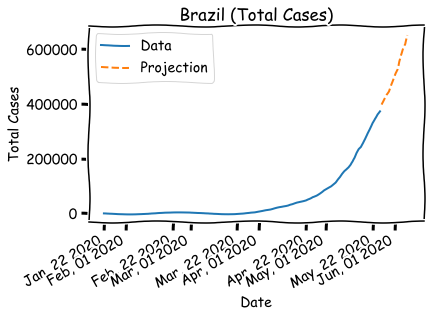

In [0]:
from matplotlib import pyplot as plt
from matplotlib import dates as mpl_dates
plt.xkcd()
fig, ax = plt.subplots()

country='Brazil'
variable='Total Cases'

ax.plot_date(projection_dataframes[country].loc[projection_dataframes[country]['Prediction']==False]
             .index, projection_dataframes[country].loc[projection_dataframes[country]['Prediction']==False][variable], label="Data", linestyle='solid', marker=None)
ax.plot_date(projection_dataframes[country].loc[projection_dataframes[country]['Prediction']==True]
             .index, projection_dataframes[country].loc[projection_dataframes[country]['Prediction']==True][variable], label="Projection", linestyle='--', marker=None)
date_format=mpl_dates.DateFormatter('%b, %d %Y')
ax.xaxis.set_major_formatter(date_format)
ax.set_xlabel('Date')
ax.set_ylabel('Total Cases')
ax.set_title('Brazil (Total Cases)')
ax.legend()
fig.autofmt_xdate()

plt.show()

# Data Visualization

## Static Data Visualization (Matplotlib)

In [0]:
# temporarily markdown

for i in df_confirmed:
  print("The country is:", i)
  plt.figure()
  plt.plot(df_confirmed.index, df_confirmed[i], color = "b", label = "Confirmed Cases");
  plt.plot(df_active.index, df_active[i], color = "y", label = "Active Cases");
  plt.plot(df_death.index, df_death[i], color = "r", label = "Death Cases");
  plt.plot(df_recovered.index, df_recovered[i], color = "g", label = "Recovered Cases");
  plt.legend(loc = "best")
  plt.show()

## Interactive Data Visualization <br>


### World Map (temporarily deleted)


### Interactive Plotting

In [0]:
import bokeh
from bokeh.io import output_notebook
from bokeh.plotting import figure, output_file, show
from bokeh.models import ColumnDataSource, HoverTool

import warnings
warnings.filterwarnings('ignore')

output_notebook()

# data
x_line = all_dataframes['active'].index
y_line = all_dataframes['active'].Germany

# line plot
line_plot = figure(plot_width=500, plot_height=325, title='Covid-19 Cases in Germany', x_axis_label='Date', 
                   y_axis_label='Active Cases', x_axis_type='datetime')
line_plot.line(x_line, y_line, legend='Active Cases', line_width=2)


show(line_plot)

Loading BokehJS ...

#### Using Bokeh and ipywidgets

In [0]:
# line plot - multiple lines

from bokeh.layouts import layout
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual, Layout
from bokeh.models import Range1d, Span

############################################################################
#Widgets:

#Dropdown Widget:
drop_down = widgets.Dropdown(options=all_dataframes['confirmed'].columns,
                                value="Germany",
                                description='Country:',
                                disabled=False)

#Selection Range Slider Widget:
range_slider= widgets.SelectionRangeSlider(
    options=all_dataframes["confirmed"].index,
    index=(0, 124),
    description='Timeframe',
    disabled=False
)

# create slider
#dates = list(pd.date_range(all_dataframes["confirmed"].index.min(), all_dataframes["confirmed"].index.max(), freq='D'))
#options = [(i.strftime('%Y-%m-%d'), i) for i in dates]
#index = (0, len(dates)-1)
#myslider = widgets.SelectionRangeSlider(
#    options = options,
#    index = index,
#    description = 'Timeframe:',
#    orientation = 'horizontal',
#    layout={'width': '800px'}
#)

startdatepicker = widgets.DatePicker(
    description='Pick a Startdate:',
    disabled=False,
    style = {'description_width': 'initial'}
)

enddatepicker = widgets.DatePicker(
    description='Pick an Enddate:',
    disabled=False,
    style = {'description_width': 'initial'}
)

#Multi-Select Widget:

#multi_select = widgets.SelectMultiple(options=all_dataframes.keys(),
#    value=['confirmed'],
#    #rows=10,
#    description='Counts:',
#    disabled=False
#)
############################################################################

############################################################################
#plotting function
def plot_country(country, startdate, enddate,
                 confirmed = True, active = False, recovered = False, death = False,
                 include_prediction = False
                ):

  # plot: 
  multi_line_plot = figure(plot_width=900, plot_height=425, title='Covid-19 Cases in {}'.format(country), 
                           x_axis_label='Date', y_axis_label='No. of Cases in {}'.format(country),
                           x_axis_type='datetime', y_axis_type = "linear")
  multi_line_plot.title.text_font_size = "35px"
  multi_line_plot.title.align = "center"

  multi_line_plot.left[0].formatter.use_scientific = False
    
  #lines:
  if confirmed == True:
      multi_line_plot.line(x = "Date", y=country, source = all_dataframes['confirmed'],
                       color='black', line_width=2, line_dash = "dashed", legend = "Confirmed Cases")
  if active == True:
      multi_line_plot.line(x = "Date", y=country, source = all_dataframes['active'],
                       color='blue', line_width=2, legend = "Active Cases")
  if recovered == True:
      multi_line_plot.line(x = "Date", y=country, source = all_dataframes['recovered'],
                       color='green', line_width=2, legend = "Recovered Cases")
  if death == True:
      multi_line_plot.line(x = "Date", y=country, source = all_dataframes['death'],
                       color='red', line_width=2, legend = "Death Cases")

  if include_prediction == True:
    multi_line_plot.line(projection_dataframes[country].loc[projection_dataframes[country]['Prediction']==True]
             .index, projection_dataframes[country].loc[projection_dataframes[country]['Prediction']==True][variable], 
                 legend="Projection", line_dash = "dashed",  color='black', line_width=2)
  multi_line_plot.x_range = Range1d(startdate, enddate)
  
    
  prediction_beginning = all_dataframes['confirmed'].index.max()
  beginning_of_prediction = Span(location=prediction_beginning,
                            dimension='height', line_color='red',
                            line_dash='dashed', line_width=1) 
  multi_line_plot.add_layout(beginning_of_prediction)
    
  # add hover tool
  hover = HoverTool()
  hover.tooltips = [('Date','@Date{%F}'),('No. of Cases','@{}'.format(country))]
  hover.formatters = {'Date': 'datetime'} 
  multi_line_plot.add_tools(hover)

  #format legend
  multi_line_plot.legend.location = "top_left"
  multi_line_plot.legend.orientation = "vertical"
  multi_line_plot.legend.background_fill_alpha = 0.35

  show(multi_line_plot)
############################################################################

############################################################################
#Interact function:
interact(plot_country, country = drop_down, startdate = startdatepicker, enddate = enddatepicker);
############################################################################


#To complete the plot, we need to implement the forecast

#We not only need a forecast for the confirmed cases (confirmed cases from day before + new cases),
#but also a forecast for the active cases, the death cases and the recovered cases!

#Then we can think about implementing the forecasts into the plot, maybe even with an additional checkbox
#e.g "Include forecasts?" 
#and an easy if-clause in the plot_country function

interactive(children=(Dropdown(description='Country:', index=65, options=('Afghanistan', 'Albania', 'Algeria',…

#### Using Bokeh with its own dropdown widget

In [0]:
# temporarily markdown

#different approach: Here, I try to use bokeh's own dropdown widget instead of the ipywidgets dropdown widget

from bokeh.io import output_file, show, push_notebook
from bokeh.models import Dropdown
from bokeh.layouts import column, row

menu = list(df_confirmed.columns)
dropdown = Dropdown(label="Country Selection", button_type="warning", menu=menu, value="Germany")

#dropdown.js_link("value", multi_line_plot, "country")
#here I have to write a javascript link to link a change in the dropdown to a change in the graph, which I can't do

show(row(line_plot, dropdown))

In [0]:
# temporarily markdown

#different idea was to use a stacked area plot instead of a line plot
x = df_confirmed.index
stacked_area_plot = figure(plot_width=600, plot_height=300, x_axis_type='datetime')

stacked_area_plot.varea_stack(x=x, 
                              stackers= [df_death.Germany, df_recovered.Germany, df_active.Germany],
                              color=('red', 'green', 'orange'))

show(stacked_area_plot)

In [0]:
# stacked_area_plot = figure(plot_width=600, plot_height=300)
# stacked_area_plot.varea(y1=stack(),       y2=stack('Germany'),         x='Date', color='red', source=df_death, name='Death Cases')
# stacked_area_plot.varea(y1=stack('2016'), y2=stack('2016', '2017'), x='Date', color='green',  source=df_recovered, name='Recovered Cases')

### using ipywidgets

In [0]:
#!pip install ipywidgets
!jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: ok


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
%matplotlib inline
import matplotlib.dates as mdates

#dstart = df_confirmed.index[startdate]
#dend = df_confirmed.index[enddate]

def country_visualization(country):#, startdate, enddate):
  #plt.figure()
  fig, ax = plt.subplots(figsize = [18.5, 6.5], dpi = 200, facecolor = "WhiteSmoke")
  ax.plot(all_dataframes['confirmed'].index, all_dataframes['confirmed'][country], color = "black", linestyle = "dashed", linewidth = 2, label = "Confirmed Cases");
  #ax.set_xlim([pd.to_datetime('2020-01-28 23:50:00'), pd.to_datetime('2020-02-29 00:10:00')])
  #plt.xlim(pd.to_datetime('2020-01-28 23:50:00'), pd.to_datetime('2020-02-29 00:10:00'))
  #plt.xlim(xlim((left, right)))
  ax.set_xticks(all_dataframes['confirmed'].index)
  ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))
  ax.xaxis.set_minor_formatter(mdates.DateFormatter("%Y-%m-%d"))
  _=plt.xticks(rotation=90)
  #plt.xlim(df_confirmed.index[startdate], df_confirmed.index[enddate])
  #plt.xlim([df_confirmed.index[startdate], df_confirmed.index[enddate]])
  ax.plot(all_dataframes['active'].index, all_dataframes['active'][country], color = "b", linestyle = "-", linewidth = 2, label = "Active Cases");
  #ax.set_xlim([pd.to_datetime('2020-01-28 23:50:00'), pd.to_datetime('2020-02-29 00:10:00')])
  ax.plot(all_dataframes['death'].index, all_dataframes['death'][country], color = "r", linestyle = "-", linewidth = 2, label = "Death Cases");
  #ax.set_xlim([pd.to_datetime('2020-01-28 23:50:00'), pd.to_datetime('2020-02-29 00:10:00')])
  ax.plot(all_dataframes['recovered'].index, all_dataframes['recovered'][country], color = "g", linestyle = "-", linewidth = 2, label = "Recovered Cases");
  #ax.set_xlim([pd.to_datetime('2020-01-28 23:50:00'), pd.to_datetime('2020-02-29 00:10:00')])
  #plt.xlim(pd.to_datetime('2020-01-28 23:50:00'), pd.to_datetime('2020-02-29 00:10:00'))
  ax.legend(loc = "best");
  plt.xlabel('Date')
  plt.ylabel('No. of Cases')
  plt.title('Covid-19 Cases in {}'.format(country))
  #plt.set_xlim([df_confirmed.index[startdate], df_confirmed.index[enddate]])
  plt.show();

interactive_plot = interact(country_visualization, country = all_dataframes['confirmed'].columns)#, startdate = all_dataframes['confirmed'].index, enddate = all_dataframes['confirmed'].index)
interactive_plot;

interactive(children=(Dropdown(description='country', options=('Afghanistan', 'Albania', 'Algeria', 'Andorra',…

In [0]:
import datetime
dates = [datetime.date(2015, i, 1) for i in range(1, 13)]
options = [(i.strftime('%b'), i) for i in dates]
widgets.SelectionRangeSlider(
    options=options,
    index=(0, 11),
    description='Months (2015)',
    disabled=False
)

SelectionRangeSlider(description='Months (2015)', index=(0, 11), options=(('Jan', datetime.date(2015, 1, 1)), …